# Exploratory Data Analysis for the CICMOD Dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

climind = pd.read_csv("climate_indices.csv")
climind = climind.set_index(["model", "year", "month", "index"]).unstack(level=-1)[
    "value"
]

FOCI = climind.loc[('FOCI')].reset_index().drop(columns=['year','month'])
CESM = climind.loc[('CESM')].reset_index().drop(columns=['year','month'])

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_acf_pacf(df, lags=200, column='PREC_SAHEL'):
    fig, ax = plt.subplots(2, 1, figsize=(15,8))
    plot_acf(df[column], title="ACF for timeseries", lags=lags, ax=ax[0])
    plot_pacf(df[column], title="PACF for timeseries", lags=lags, ax=ax[1])
    fig.tight_layout()
    plt.show()

def plot_decomposition(df, column='PREC_SAHEL', period=12):
    df = df.copy(deep=True)
    df = df.loc[:, column]
    df.dropna(inplace=True)
    result = seasonal_decompose(df, model='additive', period=period)
    fig, ax = plt.subplots(4, 1, figsize=(15,8))
    ax[0].plot(result.observed)
    ax[0].set_title("Observed values")
    ax[1].plot(result.trend)
    ax[1].set_title("Observed trend")
    ax[2].plot(result.seasonal)
    ax[2].set_title("Observed seasonal component")
    ax[3].plot(result.resid)
    ax[3].set_title("Observed residual component")
    fig.suptitle(f"Decomposition with Period Length {period}")
    fig.tight_layout()
    plt.show()



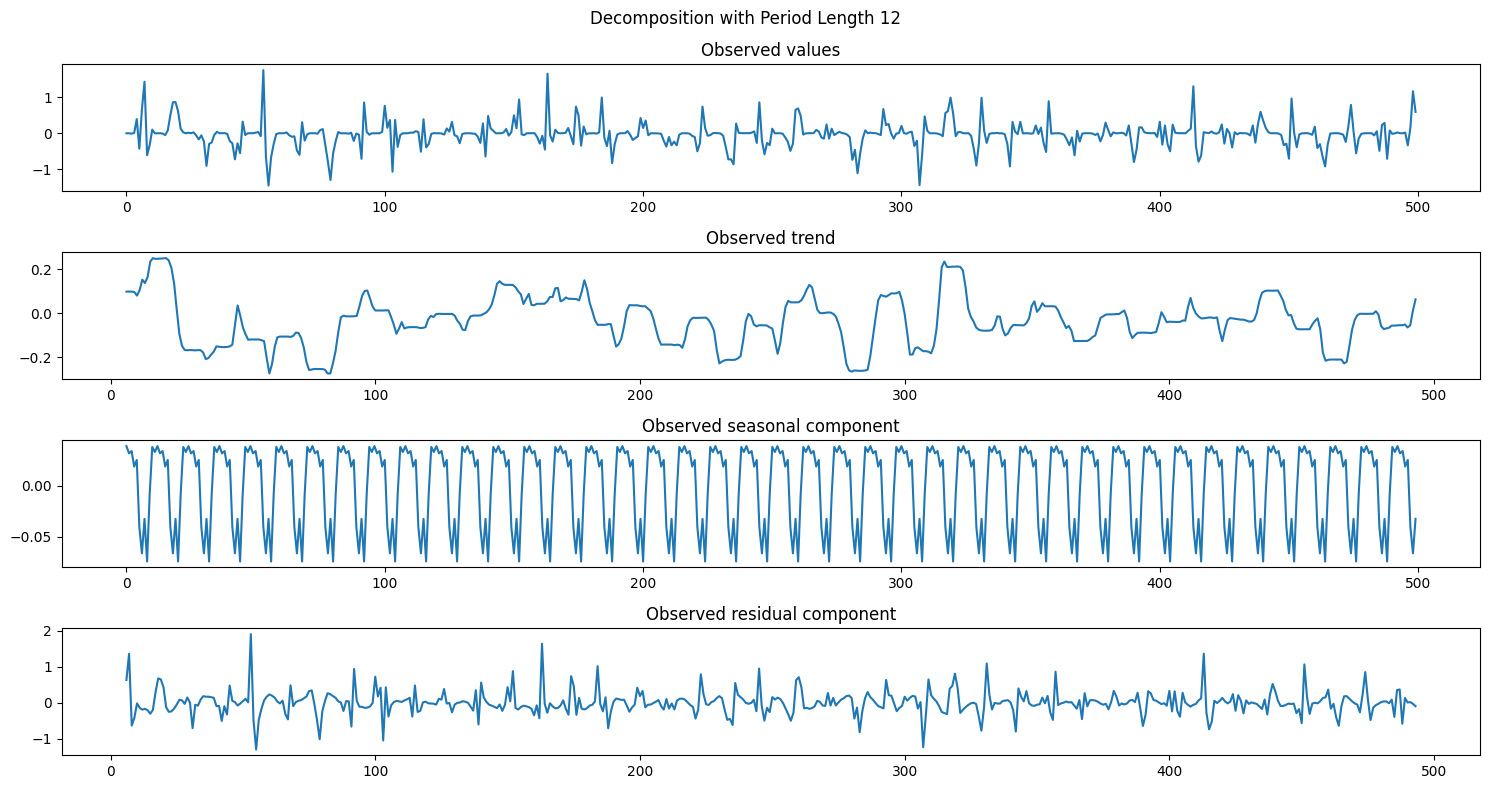

In [33]:
plot_decomposition(FOCI[:500])

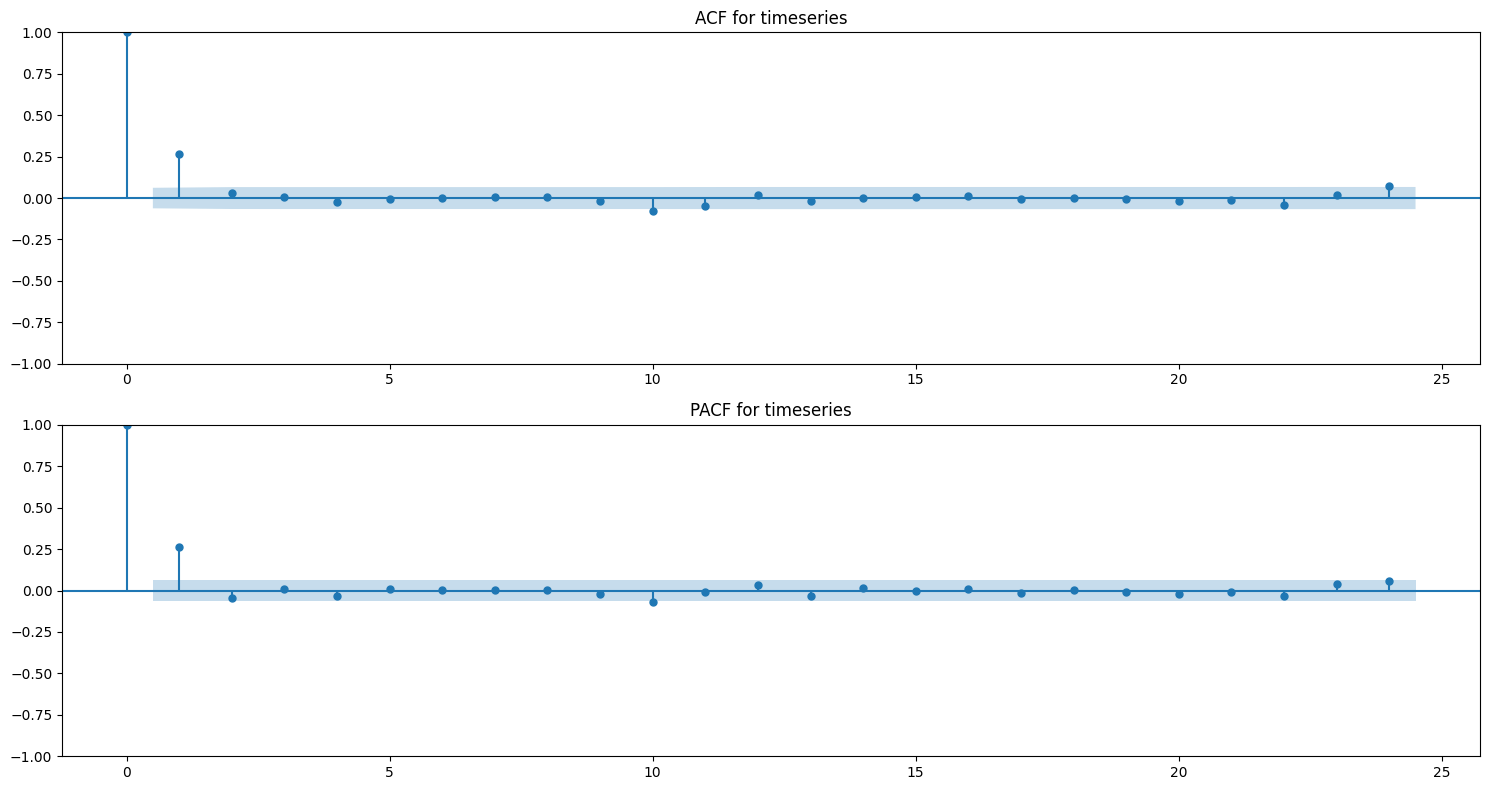

In [34]:
plot_acf_pacf(FOCI[:1000], lags=24)